In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/food52_scraped_data.csv')

In [3]:
df.head()

,_id,rating,recipe,title,weblink
0,59d7cf29a980892888190548,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...
1,59d7cf30a98089288819054a,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...
2,59d7cf39a98089288819054c,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...
3,59d7cf3fa98089288819054e,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...
4,59d7cf48a980892888190550,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...


In [4]:
df.dropna(inplace=True)

In [5]:
df_out = df[['title','weblink']]
df_out.head()

,title,weblink
0,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...
1,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...
2,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...
3,Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...
4,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...


In [6]:
df_out.to_csv('data/scraper2_links.csv')

In [22]:
rec_X = df['recipe'].values

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf_rec = TfidfVectorizer(analyzer='word', stop_words='english')

In [25]:
tf_rec = tfidf_rec.fit_transform(rec_X)

In [33]:
def clustering_algorithm(tfidf, labels):

    svd = TruncatedSVD(algorithm='randomized', random_state=42)
    X_new = svd.fit_transform(tfidf)
    tsne_mod = TSNE(n_components=2, verbose=1, random_state=0, perplexity=40)
    coords = tsne_mod.fit_transform(X_new)
    x, y = coords[:, 0], coords[:, 1]
#     plt.scatter(x, y, alpha=0.5, cmap=plt.cm.Spectral)
#     plt.show()
    return x, y

In [66]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

# nmf = NMF(n_components=8, random_state=1,
#           alpha=.1, l1_ratio=.5).fit(tf_rec)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                        max_features=200,
                        stop_words='english')
tf = tf_vectorizer.fit_transform(df['recipe'])
lda = LatentDirichletAllocation(n_topics=6, max_iter=5,
                            learning_method='online',
                            learning_offset=50.,
                            random_state=0,
                            n_jobs=-1)
mod = lda.fit(tf)
comp = mod.components_
lda_labels = comp[:,0]

tf_feature_names = tf_vectorizer.get_feature_names()
x2, y2 = clustering_algorithm(tf, lda_labels)



[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 9233
[t-SNE] Computed conditional probabilities for sample 2000 / 9233
[t-SNE] Computed conditional probabilities for sample 3000 / 9233
[t-SNE] Computed conditional probabilities for sample 4000 / 9233
[t-SNE] Computed conditional probabilities for sample 5000 / 9233
[t-SNE] Computed conditional probabilities for sample 6000 / 9233
[t-SNE] Computed conditional probabilities for sample 7000 / 9233
[t-SNE] Computed conditional probabilities for sample 8000 / 9233
[t-SNE] Computed conditional probabilities for sample 9000 / 9233
[t-SNE] Computed conditional probabilities for sample 9233 / 9233
[t-SNE] Mean sigma: 0.108036
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.271053
[t-SNE] Error after 350 iterations: 1.271053


In [72]:
lda_labels[:100]

array([ 134.85915437,   54.31463098,   30.67538116,   40.01342564,
        142.63061352,  154.80384074,   82.44954077,   11.87562195])

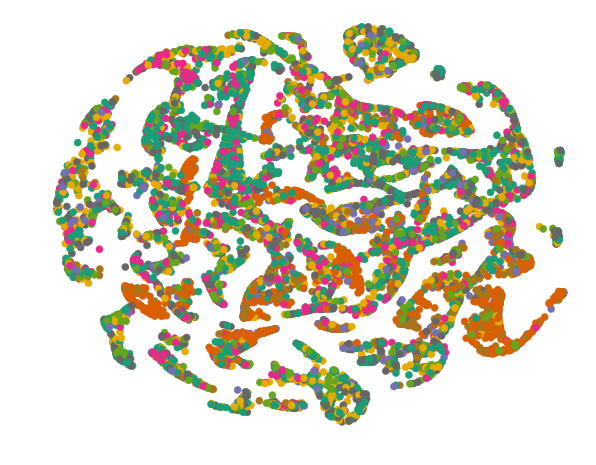

In [78]:
# import matplotlib.pyplot as plt
# import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

colors = lda_labels
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x2, y2, c=labels_rec, cmap='Dark2')
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axis('off')
ax.axis('tight')
plt.grid(False)

In [84]:
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components=8, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tf_rec)
nmf_w = nmf.fit_transform(tf_rec)

nmf_h = nmf.components_
labels_rec = nmf_w.argmax(axis=1) # this was the right code to get labels/clusters
x, y = clustering_algorithm(tf_rec, labels_rec)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 9233
[t-SNE] Computed conditional probabilities for sample 2000 / 9233
[t-SNE] Computed conditional probabilities for sample 3000 / 9233
[t-SNE] Computed conditional probabilities for sample 4000 / 9233
[t-SNE] Computed conditional probabilities for sample 5000 / 9233
[t-SNE] Computed conditional probabilities for sample 6000 / 9233
[t-SNE] Computed conditional probabilities for sample 7000 / 9233
[t-SNE] Computed conditional probabilities for sample 8000 / 9233
[t-SNE] Computed conditional probabilities for sample 9000 / 9233
[t-SNE] Computed conditional probabilities for sample 9233 / 9233
[t-SNE] Mean sigma: 0.007642
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.271206
[t-SNE] Error after 300 iterations: 1.271206


In [89]:
# tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tf_X2 = df['title'].values
tf_title = tfidf_rec.fit_transform(tf_X2)
nmf2 = NMF(n_components=8, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tf_title)
nmf_w2 = nmf2.fit_transform(tf_title)

nmf_h2 = nmf2.components_
labels_rec2 = nmf_w2.argmax(axis=1) # this was the right code to get labels/clusters
x3, y3 = clustering_algorithm(tf_title, labels_rec2)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 9233
[t-SNE] Computed conditional probabilities for sample 2000 / 9233
[t-SNE] Computed conditional probabilities for sample 3000 / 9233
[t-SNE] Computed conditional probabilities for sample 4000 / 9233
[t-SNE] Computed conditional probabilities for sample 5000 / 9233
[t-SNE] Computed conditional probabilities for sample 6000 / 9233
[t-SNE] Computed conditional probabilities for sample 7000 / 9233
[t-SNE] Computed conditional probabilities for sample 8000 / 9233
[t-SNE] Computed conditional probabilities for sample 9000 / 9233
[t-SNE] Computed conditional probabilities for sample 9233 / 9233
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.261244
[t-SNE] Error after 325 iterations: 1.261244


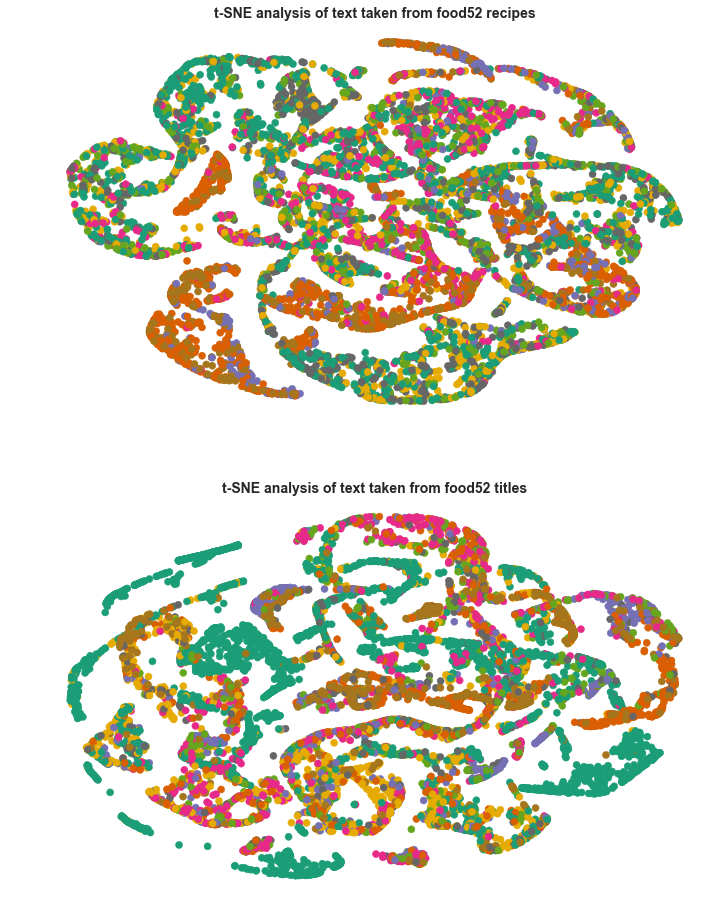

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

colors = labels_rec
colors2 = labels_rec2
fig, ax = plt.subplots(2,1, figsize=(12,16))
ax[0].scatter(x, y, c=colors, cmap='Dark2')
ax[0].set_xlim(-25, 25)
ax[0].set_ylim(-25, 25)
ax[0].set_title("t-SNE analysis of text taken from food52 recipes", fontsize=14, fontweight='bold')
ax[0].axis('off')
ax[0].axis('tight')
ax[0].grid(False)

ax[1].scatter(x3, y3, c=colors2, cmap='Dark2')
ax[1].set_xlim(-25, 25)
ax[1].set_ylim(-25, 25)
ax[1].set_title("t-SNE analysis of text taken from food52 titles", fontsize=14, fontweight='bold')
ax[1].axis('off')
ax[1].axis('tight')
ax[1].grid(False)

plt.savefig('data/recipe_text_tsne.png')
# ax.set_ylim([0, 1000])
# ax.set_xlim([-10, 500])
# ax.set_title('Distribution of Recipe "Likes"', fontsize=16, weight='bold', color='k')
# ax.set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
# ax.set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
# ax.grid(False)
# plt.savefig('data/distribution.png')

In [30]:
len(df['rating'].where(df['rating'] == 0))

9721

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 5 columns):
_id        9721 non-null object
rating     9721 non-null int64
recipe     9233 non-null object
title      9721 non-null object
weblink    9721 non-null object
dtypes: int64(1), object(4)
memory usage: 379.8+ KB


In [32]:
import numpy as np
import string

In [33]:
def main_ingredient(col):
    ingredients = ['pork', 'chicken', 'beef']
    for item in ingredients:
        if item in str(col):
            return item
        else:
            continue

In [34]:
df['category'] = df['recipe'].apply(main_ingredient)

In [35]:
df['category'].value_counts()

chicken    2137
pork        696
beef        625
Name: category, dtype: int64

In [36]:
dummies = pd.get_dummies(df['category'])

In [37]:
dummies.head()

,beef,chicken,pork
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [38]:
df2 = pd.concat([df,dummies], axis=1)

In [39]:
df2.head()

,_id,rating,recipe,title,weblink,category,beef,chicken,pork
0,59d7cf29a980892888190548,14,2 tablespoons unsalted butter\n1/4 cup diced y...,Austin Diner-Style Queso,https://food52.com/recipes/73529-austin-diner-...,None,0,0,0
1,59d7cf30a98089288819054a,29,1 pound shelled raw peanuts\n1 tablespoon plus...,Mamba (Spicy Haitian Peanut Butter),https://food52.com/recipes/73211-mamba-spicy-h...,None,0,0,0
2,59d7cf39a98089288819054c,2,2 cups (8 1/2 ounces) all-purpose flour\n1/2 c...,Sheet Pan Muffins,https://food52.com/recipes/73548-sheet-pan-muf...,None,0,0,0
3,59d7cf3fa98089288819054e,92,"1 1/2 cups (300g) Puy lentils, washed\n4 clove...",Anna Jones' Favorite Lentils with Roasted Toma...,https://food52.com/recipes/73511-anna-jones-fa...,beef,1,0,0
4,59d7cf48a980892888190550,3,2 ounces Seedlip Garden 108\n0.75 ounces Lemon...,Seedlip's A Good Dill,https://food52.com/recipes/73252-seedlip-s-a-g...,None,0,0,0


In [40]:
del df2['_id']

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721 entries, 0 to 9720
Data columns (total 8 columns):
rating      9721 non-null int64
recipe      9233 non-null object
title       9721 non-null object
weblink     9721 non-null object
category    3458 non-null object
beef        9721 non-null uint8
chicken     9721 non-null uint8
pork        9721 non-null uint8
dtypes: int64(1), object(4), uint8(3)
memory usage: 408.3+ KB


In [42]:
df2.dropna(axis=0, subset=['recipe'], inplace=True)

In [208]:
# df2['vegetarian'] = df2['category'].isnull()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
from sklearn.decomposition import NMF

## topic extraction from recipe title

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
def label(col):
    if col <= 10:
        return True
    if col != 0:
        return False
    
df2['label'] = df2['rating'].apply(label)

In [47]:
X_recipe_text = df2['recipe'].values

In [48]:
tfidf_vectorizer = TfidfVectorizer()

In [49]:
tfidf2 = tfidf_vectorizer.fit_transform(X_recipe_text)

In [50]:
y = df2['label'].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(tfidf2, y, test_size=0.33, random_state=42)

In [53]:
mnb = MultinomialNB()

In [54]:
mnb_mod = mnb.fit(X_train, y_train)

In [55]:
mnb_mod.score(X_test, y_test)

0.7036429274696423

In [56]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, mnb_mod.predict_proba(X_test)[:, 0])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.21


In [57]:
X = df2['title']

In [58]:
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [59]:
tfidf = tfidf_vectorizer.fit_transform(X)

In [60]:
nmf = NMF(n_components=8, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)

In [61]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [62]:
nmf_w = nmf.fit_transform(tfidf)
nmf_h = nmf.components_

In [139]:
df2['topic_labels'] = nmf_w.argmax(axis=1) # this was the right code to get labels/clusters

In [141]:
dum_top = pd.get_dummies(df2['topic_labels'])

In [144]:
dum_top[7]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9630    0
9631    0
9632    0
9634    0
9635    0
9636    0
9637    0
9639    0
9640    0
9641    0
9642    0
9643    0
9644    0
9645    0
9646    0
9648    0
9649    0
9650    0
9651    0
9652    0
9653    0
9654    0
9655    0
9656    0
9657    0
9658    0
9659    0
9660    0
9661    0
9714    1
Name: 7, Length: 9233, dtype: uint8

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 10 columns):
rating          9233 non-null int64
recipe          9233 non-null object
title           9233 non-null object
weblink         9233 non-null object
category        3458 non-null object
beef            9233 non-null uint8
chicken         9233 non-null uint8
pork            9233 non-null uint8
label           9233 non-null bool
topic_labels    9233 non-null int64
dtypes: bool(1), int64(2), object(4), uint8(3)
memory usage: 541.0+ KB


In [65]:
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words=5)


Topics in NMF model (Frobenius norm):
Topic #0: and with sausage sweet cheese
Topic #1: chicken roast fried lemon curry
Topic #2: salad dressing summer vinaigrette potato
Topic #3: soup noodle lentil bean mushroom
Topic #4: pork sauce tenderloin chops pulled
Topic #5: roasted garlic cauliflower potatoes squash
Topic #6: chocolate cake cream cookies ice
Topic #7: beef stew spicy corned braised



In [131]:
topics = {0:'sausage_dish', 1:'chicken_dish', 2:'salad_dish', 3:'soup_dish', 4:'pork_dish', 5:'vegetable_dish', 6:'dessert_dish', 7:'beef_dish'}

In [132]:
def title_topics(col):
    return topics[col]

In [133]:
df2['topic_word'] = df2['topic_labels'].apply(title_topics)

In [134]:
dum = pd.get_dummies(df2['topic_word'])

In [136]:
dum = dum.drop(dum.iloc[:, -1])

In [138]:
dum.head()

,beef_dish,chicken_dish,dessert_dish,pork_dish,salad_dish,sausage_dish,soup_dish,vegetable_dish
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,0


In [71]:
df2 = pd.concat([df2, dum], axis=1)

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 18 columns):
rating            9233 non-null int64
recipe            9233 non-null object
title             9233 non-null object
weblink           9233 non-null object
category          3458 non-null object
beef              9233 non-null uint8
chicken           9233 non-null uint8
pork              9233 non-null uint8
label             9233 non-null bool
topic_labels      9233 non-null int64
topic_word        9233 non-null object
chicken_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
pork_dish         9233 non-null uint8
salad_dish        9233 non-null uint8
sausage_dish      9233 non-null uint8
soup_dish         9233 non-null uint8
vegetable_dish    9233 non-null uint8
dtypes: bool(1), int64(2), object(5), uint8(10)
memory usage: 676.2+ KB


In [211]:
# def label(col):
#     if col <= 2:
#         return True
#     if col != 0:
#         return False
    
# df2['label'] = df2['rating'].apply(label)

In [73]:
df2['label'].value_counts()

False    6160
True     3073
Name: label, dtype: int64

In [74]:
dum.columns

Index(['chicken_dish', 'dessert_dish', 'pork_dish', 'salad_dish',
       'sausage_dish', 'soup_dish', 'vegetable_dish'],
      dtype='object')

In [75]:
working = df2[['label','rating', 'beef', 'chicken', 'pork','chicken_dish', 'dessert_dish', 'pork_dish', 'salad_dish', 'sausage_dish',
       'soup_dish', 'vegetable_dish']]

In [76]:
working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 12 columns):
label             9233 non-null bool
rating            9233 non-null int64
beef              9233 non-null uint8
chicken           9233 non-null uint8
pork              9233 non-null uint8
chicken_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
pork_dish         9233 non-null uint8
salad_dish        9233 non-null uint8
sausage_dish      9233 non-null uint8
soup_dish         9233 non-null uint8
vegetable_dish    9233 non-null uint8
dtypes: bool(1), int64(1), uint8(10)
memory usage: 243.4 KB


In [77]:
working.head()

,label,rating,beef,chicken,pork,chicken_dish,dessert_dish,pork_dish,salad_dish,sausage_dish,soup_dish,vegetable_dish
0,False,14,0,0,0,1,0,0,0,0,0,0
1,False,29,0,0,0,0,1,0,0,0,0,0
2,True,2,0,0,0,0,0,0,0,0,0,1
3,False,92,1,0,0,0,0,0,0,0,0,1
4,True,3,0,0,0,0,0,0,0,1,0,0


In [79]:
# _, i = np.unique(working.columns, return_index=True)

In [78]:
# working = working.iloc[:, i]
# working.info()

In [244]:
# working['label'] = df2['label']

In [80]:
y = working.pop('label')
del working['rating']
# y = working.pop('log_rating')

In [81]:
working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 10 columns):
beef              9233 non-null uint8
chicken           9233 non-null uint8
pork              9233 non-null uint8
chicken_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
pork_dish         9233 non-null uint8
salad_dish        9233 non-null uint8
sausage_dish      9233 non-null uint8
soup_dish         9233 non-null uint8
vegetable_dish    9233 non-null uint8
dtypes: uint8(10)
memory usage: 162.3 KB


In [82]:
X = working.values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [85]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_features="auto")
logistic = LogisticRegression(n_jobs=-1)

In [86]:
mod4 = gbc.fit(X_train, y_train)
mod3 = logistic.fit(X_train, y_train)

In [89]:
mod4.score(X_test, y_test)


0.70101739415818842

In [90]:
mod3.score(X_test, y_test)

0.70200196914998358

In [91]:
features = mod4.feature_importances_

In [92]:
y_pred = mod4.predict_proba(X_test)

In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
precision, recall, thresholds = precision_recall_curve(y_test, mod4.decision_function(X_test))

In [95]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, mod4.decision_function(X_test))

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.55


In [96]:
from sklearn.metrics import roc_curve, auc

In [97]:

rating = sorted(df['rating'].values)
x = range(len(rating))
classes = [0 if num <= 10 else 1 for num in rating]


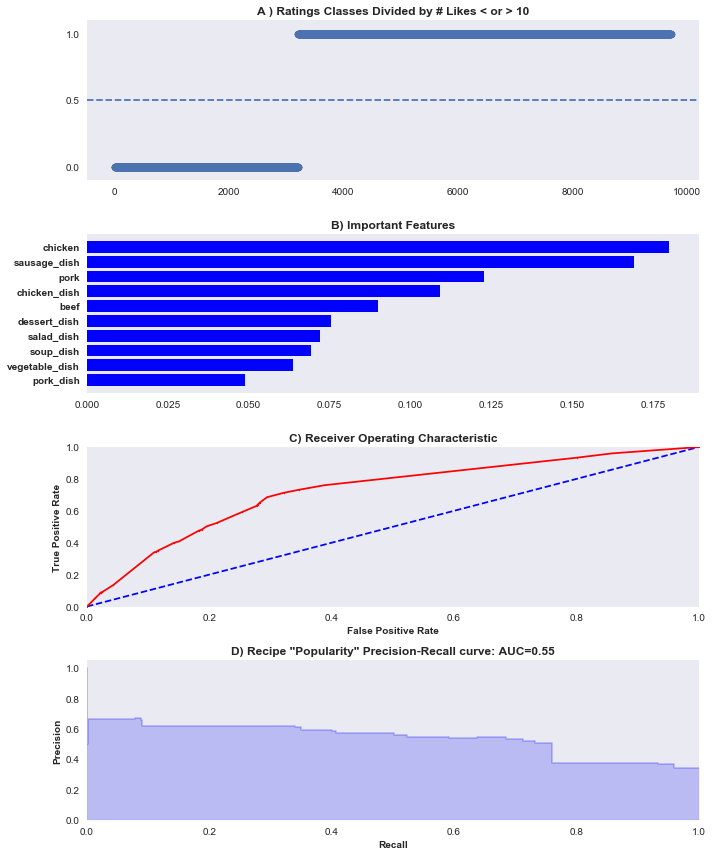

In [115]:
# features = mod4.feature_importances_
indices = np.argsort(features)
sorted_features = features[indices]
y_pos = np.arange(len(sorted_features))
labels = working.columns
sorted_labels = labels[indices]
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].scatter(x, classes)
ax[0].set_ylim(-0.1,1.1)
ax[0].set_yticks([0, 0.5, 1])
ax[0].axhline(0.5, ls='--')
ax[0].set_title('A ) Ratings Classes Divided by # Likes < or > 10', fontweight='bold', fontsize=12)
ax[0].grid(b="off")


ax[1].barh(y_pos, sorted_features, color='b')
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(sorted_labels, fontsize=10, fontweight='bold')
ax[1].set_title('B) Important Features', fontweight='bold', fontsize=12)
ax[1].grid(False)
preds = y_pred[:, 1]
fpr, tpr, _ = roc_curve(y_test, preds)
ax[2].scatter(x=fpr, y=tpr, s=1, c='r')
ax[2].plot([0, 1], [0, 1], '--', c='b')
ax[2].plot(fpr, tpr, '-', c='r')
ax[2].set_ylim(0, 1)
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('False Positive Rate', fontsize=10, fontweight='bold')
ax[2].set_ylabel('True Positive Rate', fontsize=10, fontweight='bold')
ax[2].set_title('C) Receiver Operating Characteristic', fontweight='bold', fontsize=12)
ax[2].grid(False)
ax[3].step(recall, precision, color='b', alpha=0.2, where='post')
ax[3].fill_between(recall, precision, step='post', alpha=0.2, color='b')
ax[3].set_xlabel('Recall', fontsize=10, fontweight='bold')
ax[3].set_ylabel('Precision', fontsize=10, fontweight='bold')
ax[3].set_ylim([0.0, 1.05])
ax[3].set_xlim([0.0, 1.0])
ax[3].set_title('D) Recipe "Popularity" Precision-Recall curve: AUC={0:0.2f}'.format(average_precision), fontweight='bold', fontsize=12)
ax[3].grid(False)
plt.tight_layout()
plt.savefig('data/classifier_analysis.png')
plt.show()

## Linear modeling of data

In [234]:
from sklearn.model_selection import train_test_split

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

In [328]:
working_linear = df2[['label','rating', 'beef', 'chicken', 'pork','chicken_dish', 'dessert_dish', 'pork_dish', 'salad_dish', 'sausage_dish',
       'soup_dish', 'vegetable_dish']]

In [329]:
import numpy as np
def log_transform(col):
    return np.log(col + 0.1)
working_linear['log_rating'] = working_linear['rating'].apply(log_transform)

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [330]:
y_straight = working_linear.pop('rating')

In [331]:
y_log = working_linear.pop('log_rating')

In [332]:
del working_linear['label']
X2 = working_linear.values

In [333]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, y_straight, random_state=13 ) 

In [334]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_log, random_state=13 ) 

In [362]:
gbr = GradientBoostingRegressor(n_estimators=400,learning_rate=0.2, verbose=1)

In [363]:
straight = gbr.fit(X1_train, y1_train)

      Iter       Train Loss   Remaining Time 
         1      194656.3313            1.79s
         2      193825.8346            1.98s
         3      193369.8777            1.91s
         4      192912.1762            2.09s
         5      192642.6933            2.07s
         6      192376.4548            2.04s
         7      192210.3682            1.98s
         8      192063.5917            1.93s
         9      191906.8241            1.92s
        10      191826.0451            1.93s
        20      191312.1431            1.74s
        30      191161.3216            1.53s
        40      191113.5917            1.47s
        50      191072.8211            1.35s
        60      191049.8148            1.29s
        70      191036.8932            1.26s
        80      191025.8560            1.20s
        90      190998.1784            1.14s
       100      190975.2384            1.08s
       200      190873.8168            0.70s
       300      190811.2405            0.35s
       40

In [364]:
straight.score(X1_test, y1_test)

0.026403084216257366

In [365]:
straight.feature_importances_

array([ 0.07728764,  0.25293681,  0.03270129,  0.029797  ,  0.0433428 ,
        0.05381403,  0.03545113,  0.04527112,  0.03374705,  0.03355189,
        0.03594752,  0.22436133,  0.01899684,  0.01911858,  0.03304615,
        0.03062884])

In [366]:
log_mod = gbr.fit(X2_train, y2_train)

      Iter       Train Loss   Remaining Time 
         1           5.6165            1.60s
         2           5.4683            1.70s
         3           5.3476            2.12s
         4           5.2724            2.25s
         5           5.2126            2.21s
         6           5.1717            2.10s
         7           5.1357            2.11s
         8           5.1117            2.16s
         9           5.0910            2.19s
        10           5.0773            2.19s
        20           5.0201            1.73s
        30           5.0083            1.59s
        40           5.0029            1.46s
        50           4.9984            1.40s
        60           4.9949            1.35s
        70           4.9926            1.31s
        80           4.9910            1.23s
        90           4.9893            1.16s
       100           4.9879            1.11s
       200           4.9795            0.71s
       300           4.9749            0.35s
       40

In [367]:
log_mod.score(X2_test, y2_test)

0.1641204429651455

In [368]:
log_mod.feature_importances_

array([ 0.07937663,  0.20563159,  0.04610675,  0.0398295 ,  0.03442791,
        0.03288025,  0.04996315,  0.04455806,  0.03536505,  0.03512686,
        0.03917922,  0.24477239,  0.02536505,  0.02184427,  0.03400464,
        0.03156868])

In [349]:
working_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9714
Data columns (total 16 columns):
beef              9233 non-null uint8
chicken           9233 non-null uint8
pork              9233 non-null uint8
chicken_dish      9233 non-null uint8
chicken_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
dessert_dish      9233 non-null uint8
pork_dish         9233 non-null uint8
pork_dish         9233 non-null uint8
salad_dish        9233 non-null uint8
salad_dish        9233 non-null uint8
sausage_dish      9233 non-null uint8
soup_dish         9233 non-null uint8
soup_dish         9233 non-null uint8
vegetable_dish    9233 non-null uint8
vegetable_dish    9233 non-null uint8
dtypes: uint8(16)
memory usage: 536.4 KB


# Distribution of # likes

In [407]:
import seaborn as sns

In [410]:
# sns.distplot(df2['rating'], bins=1000, kde=True, rug=True);

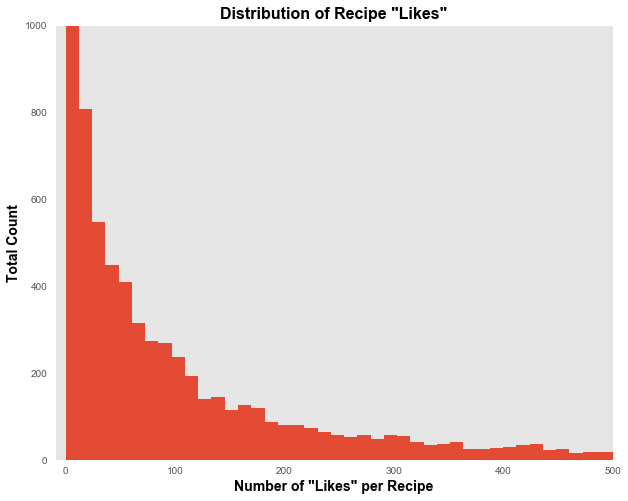

In [117]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df2['rating'], bins=1000)
ax.set_ylim([0, 1000])
ax.set_xlim([-10, 500])
ax.set_title('Distribution of Recipe "Likes"', fontsize=16, weight='bold', color='k')
ax.set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
ax.set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
ax.grid(False)
plt.savefig('data/distribution.png')

In [271]:
import numpy as np
count, division = np.histogram(df2['rating'], bins=9233)

In [391]:
y = df2['rating'].value_counts().values

In [392]:
x = df2['rating'].value_counts().index

In [393]:
x = np.array(x)

In [405]:
x.shape, y.shape, y2.shape

((1038,), (1038,), (1038,))

In [395]:
y2 = np.log(y)

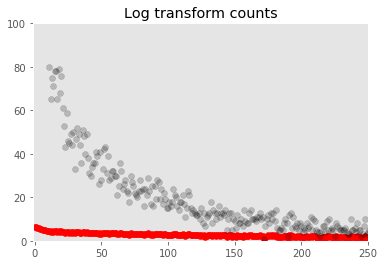

In [399]:
plt.scatter(x, y2, color='r')
plt.scatter(x, y, color='k', alpha=0.2)
plt.xlim(-1, 250)
plt.ylim(0, 100)
plt.grid('off')
plt.title('Counts')

In [270]:
import statsmodels.api as sm

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [382]:
# poisson_mod = sm.Poisson(y2.flatten(), x.flatten())
# poisson_res = poisson_mod.fit(method="newton")
# print(poisson_res.summary())

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Applications/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Applications/anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


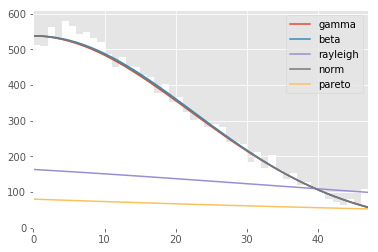

In [390]:
y3 = df2['rating'].values
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 30000
x = scipy.arange(size)
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
h = plt.hist(y, bins=range(48), color='w')

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()


In [120]:
beef = df2['rating'].where(df2['category'] == 'beef')

In [121]:
beef.dropna(inplace=True)

In [122]:
beef_df = pd.DataFrame(beef)
beef_df.reset_index(inplace=True)

In [123]:
chicken = df2['rating'].where(df2['category'] == 'chicken')

In [124]:
chicken.dropna(inplace=True)

In [125]:
pork = df2['rating'].where(df2['category'] == 'pork')

In [126]:
pork.dropna(inplace=True)

In [127]:
other = df2['rating'].where(df2['category'].isnull())

In [128]:
other.dropna(inplace=True)

In [129]:
chicken_df = pd.DataFrame(chicken)
chicken_df.reset_index(inplace=True)
pork_df = pd.DataFrame(pork)
pork_df.reset_index(inplace=True)
other_df = pd.DataFrame(other)
other_df.reset_index(inplace=True)

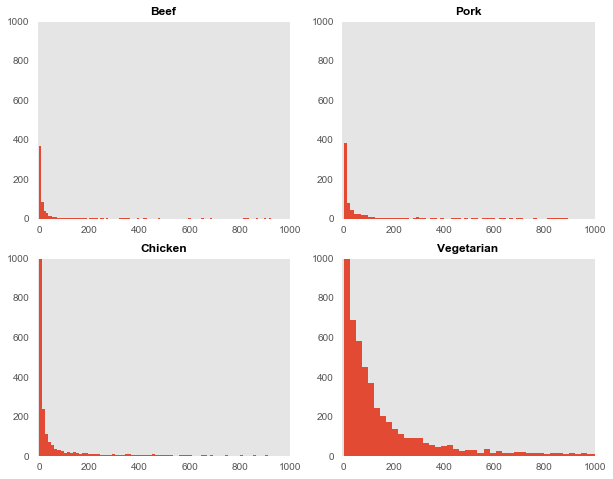

In [130]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
recipes = [beef_df, chicken_df, pork_df, other_df]
titles = ['Beef', 'Chicken', 'Pork', 'Vegetarian']
for idx, ax in enumerate(axs):
    ax[0].hist(recipes[idx]['rating'], bins=500)
    ax[1].hist(recipes[idx + 2]['rating'], bins=500)
    ax[0].set_ylim([0, 1000])
    ax[1].set_ylim([0, 1000])
    ax[0].set_xlim([-10, 1000])
    ax[1].set_xlim([-10, 1000])
    ax[0].set_title(titles[idx], fontsize=12, weight='bold', color='k')
    ax[1].set_title(titles[idx+2], fontsize=12, weight='bold', color='k')
    ax[0].grid(False)
    ax[1].grid(False)
#     ax[idx].set_xlabel('Number of "Likes" per Recipe', fontsize=14, weight='bold', color='k')
#     ax[idx].set_ylabel('Total Count', fontsize=14, weight='bold', color='k')
#     plt.tight_layout()
    plt.savefig('data/distribution_ingredients.png')

($\lambda = 1$) &nbsp;&nbsp;
$pmf = \frac{\lambda^ke^{-\lambda}}{k!}$